In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [11]:
#Reading the dataset
#xls=pd.ExcelFile('HospitalDatabase.xlsx')
xls = pd.ExcelFile('HospitalDatabase .xlsx')
#Reading the ReAdmissionRegistry sheet
df_RR=pd.read_excel(xls,'ReAdmissionRegistry')
#Reading the Patients sheet
df_PA=pd.read_excel(xls,'Patients')
#Reading the EDVisits sheet
df_EDV=pd.read_excel(xls,'EDVisits')
#Reading the AmbulatoryVisits sheet
df_AV=pd.read_excel(xls,'AmbulatoryVisits')
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')
#Reading the Providers sheet
df_P= pd.read_excel(xls, 'Providers')
#Reading the EDUnique sheet
df_EDU = pd.read_excel(xls, 'EDUnique')

In [12]:
df_RR.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN


### 1.Make a pair plot on Readmission Registry table & do u see any correlation between columns values.¶

In [ ]:
sns.pairplot(df_RR,hue="Service",palette="husl")
plt.show()
#Can not see any co-relation

### 5.Display full name of patients who are born in 1986.

In [16]:
#df_PA.head()
df_PA["FullName"] = df_PA["FirstName"] + ' ' + df_PA["LastName"]
df_PA["DateOfBirth"] = pd.to_datetime(df_PA["DateOfBirth"])
df_PA['Year'] = df_PA["DateOfBirth"].dt.year #extracting year from DateOfbirth

New_df_PA=df_PA[df_PA['Year']==1986] #Result dataframe
New_df_PA[["FullName","Year","DateOfBirth"]]

,FullName,Year,DateOfBirth
23,Gabriel Joseph,1986,1986-05-31 09:36:05.716
24,Lincoln Brenda,1986,1986-07-24 17:36:00.791
29,Ala Halpert,1986,1986-11-26 10:44:22.628
72,Lolita Darci,1986,1986-01-08 02:34:04.596
164,Fadel Bernardt,1986,1986-05-29 00:35:58.694
238,Bentley Kippax,1986,1986-02-11 06:22:40.734
367,Vale Olanda,1986,1986-04-15 00:49:58.690
373,Britt Dureden,1986,1986-11-19 23:50:47.955
386,Cristabel Chatel,1986,1986-07-10 16:27:30.640
415,Constantia Group,1986,1986-03-26 06:37:22.525


### 9.Get the list of patient ID's which are not there in ReadmissionRegistry.

In [17]:
#isin() method checks if DataFrame contains the specified values
New_df=df_PA[~df_PA['PatientID'].isin(df_RR['PatientID'])] # (~) in pandas is Boolean Not
print(list(New_df['PatientID']))

[4, 135, 145, 189, 200, 224, 234, 374, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 414, 501, 562, 599, 690, 691, 704, 726, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 9

### 13.Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.

C:\Users\avnis\AppData\Local\Temp\ipykernel_22888\2689244116.py:17: RuntimeWarning: divide by zero encountered in log10
  axes[1][1].plot(x,np.log10(y),'r--o')


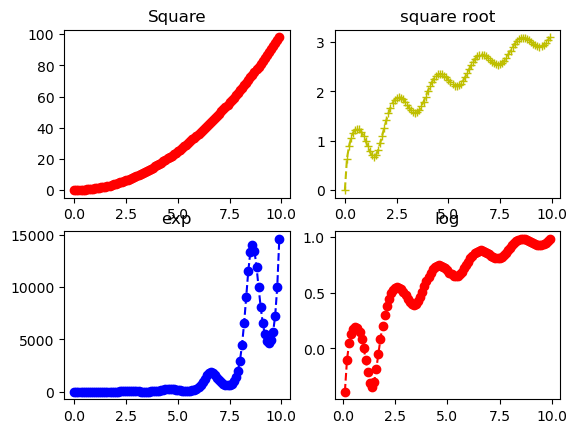

In [18]:
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi*x)+x

# creating the canvas with class 'fig'
# and it's object 'axes' with '2' row and '2' columns
fig, axes = plt.subplots(2, 2)    #syntax= Plt.subplots(nrows, ncols)
# plotting graph for 1st element
axes[0][0].plot(x, x*x,'r--o')         #square of x , solid line with r=  red colour and o= circlular marker
axes[0][0].set_title('Square')  
# plotting graph for 2nd element
axes[0][1].plot(x,np.sqrt(y),'y--+')
axes[0][1].set_title('square root') 
# plotting graph for 3rd element
axes[1][0].plot(x,np.exp(y) ,'b--o')
axes[1][0].set_title('exp')  
# plotting graph for 4th element
axes[1][1].plot(x,np.log10(y),'r--o')
axes[1][1].set_title('log')
plt.show()

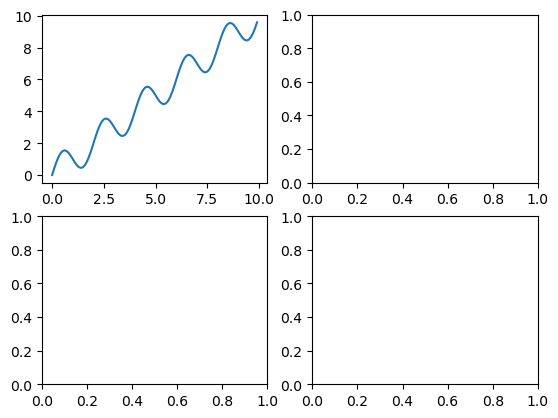

In [21]:

x = np.arange(0, 10, 0.1)
y = np.sin(np.pi*x)+x
# creating the canvas with class 'fig'
# and it's object 'axes' with '2' row and '2' columns
fig, axes = plt.subplots(2, 2)  #syntax= Plt.subplots(nrows, ncols)

for i in range(2):
    for j in range(2):
        axes[i,j].plot(x,y)
        plt.show()